In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# initialize 40 marks for passing....
passmark = 40

In [112]:
df = pd.read_csv("StudentsPerformance.csv", encoding= "unicode_escape")

In [113]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [87]:
#size of dataset
print(df.shape)

(1000, 8)


In [88]:
#basic info
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [89]:
#check missing values...
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

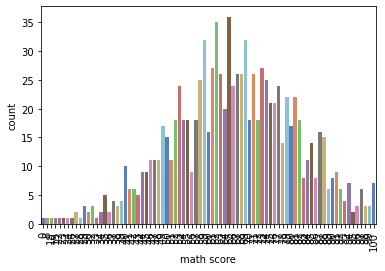

In [90]:
#check maths score....
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [91]:
#check how many students are pass n fail....
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

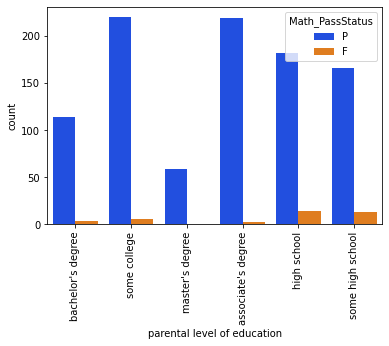

In [13]:
#check parental level of education...
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

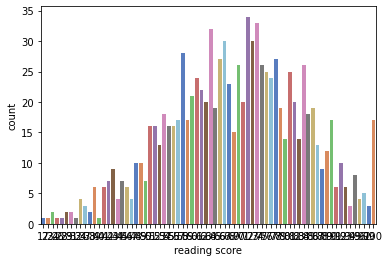

In [14]:
#check reading score
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

In [15]:
# how many students are pass in reading....
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

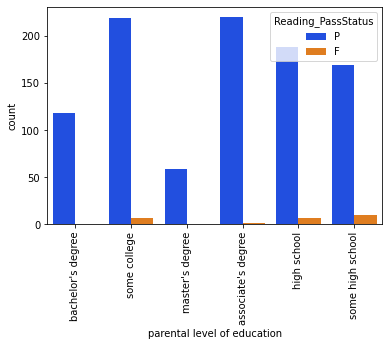

In [16]:
#check reading score in parental level of education....
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

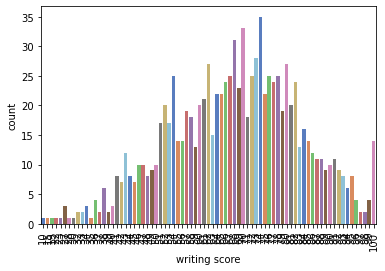

In [17]:
#check writing score....
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [18]:
#how many students are pass in writing....
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

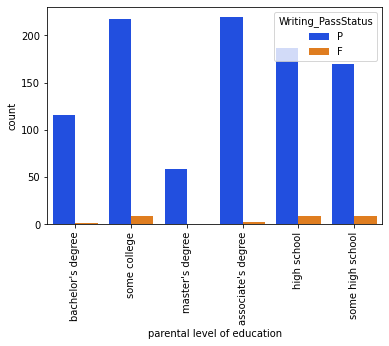

In [19]:
#check writing score in parental level of eduction....
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [20]:
#check how many students are pass in all subjects....
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

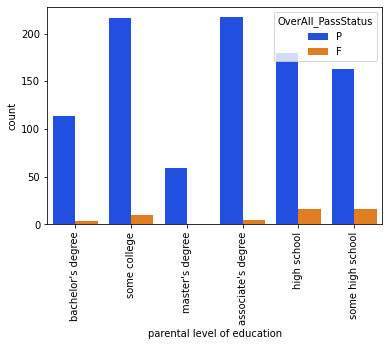

In [21]:
#check how many students pass in parental level of education....
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [115]:
#find %
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

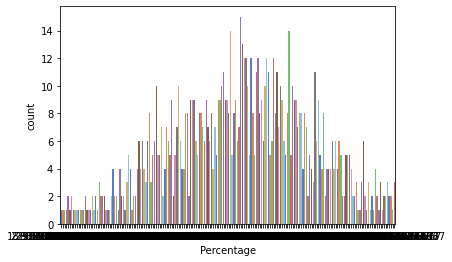

In [96]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

In [24]:
#Let us assign the grades
#Grading
#above 80 = A Grade
#70 to 80 = B Grade
#60 to 70 = C Grade
#50 to 60 = D Grade
#40 to 50 = E Grade
#below 40 = F Grade (Fail)

def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

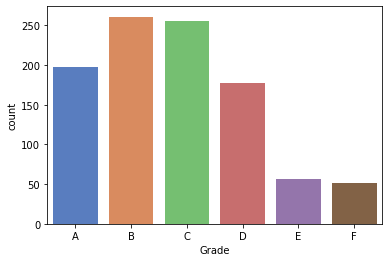

In [25]:
#plot all grades....
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

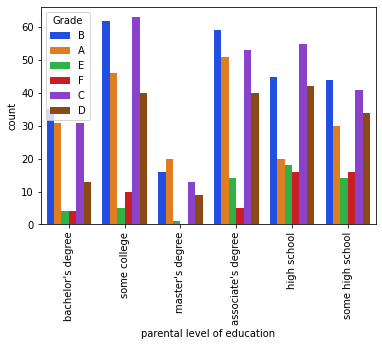

In [26]:
#plot greads in parental level of education....

p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

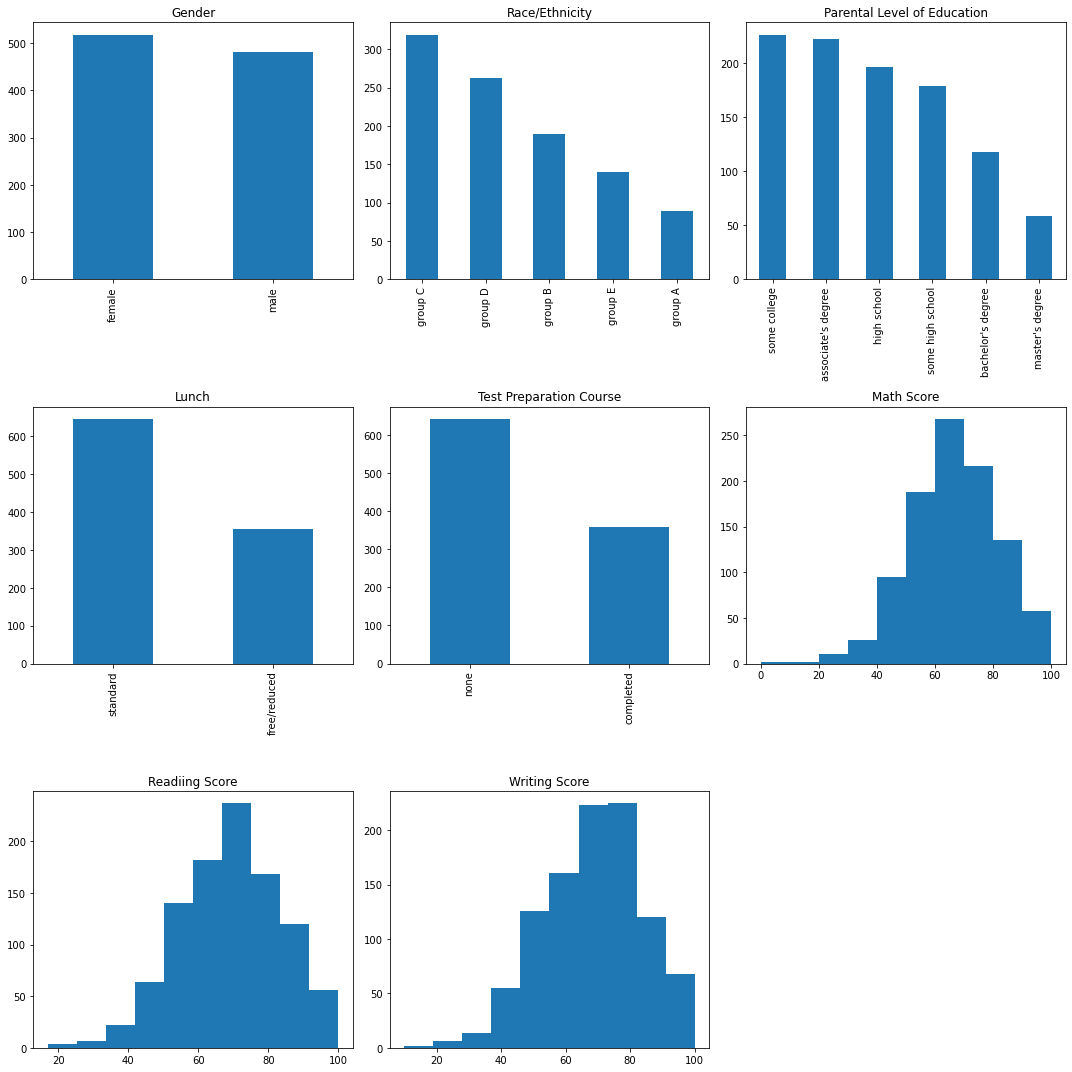

In [92]:

f, axs = plt.subplots(3,3,figsize=(15,15))
df['gender'].value_counts().plot(kind='bar', ax=axs[0,0])
axs[0,0].title.set_text('Gender')

df['race/ethnicity'].value_counts().plot(kind='bar', ax=axs[0,1])
axs[0,1].title.set_text('Race/Ethnicity')

df['parental level of education'].value_counts().plot(kind='bar', ax=axs[0,2])
axs[0,2].title.set_text('Parental Level of Education')

df['lunch'].value_counts().plot(kind='bar', ax=axs[1,0])
axs[1,0].title.set_text('Lunch')

df['test preparation course'].value_counts().plot(kind='bar', ax=axs[1,1])
axs[1,1].title.set_text('Test Preparation Course')

axs[1,2].hist(df['math score'])
axs[1,2].title.set_text('Math Score')

axs[2,0].hist(df['reading score'])
axs[2,0].title.set_text('Readiing Score')

axs[2,1].hist(df['writing score'])
axs[2,1].title.set_text('Writing Score')

f.delaxes(axs[2][2])
f.tight_layout()
plt.show()

In [116]:
#total score....
df.describe()

,math score,reading score,writing score,Total_Marks,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


<Figure size 432x432 with 0 Axes>

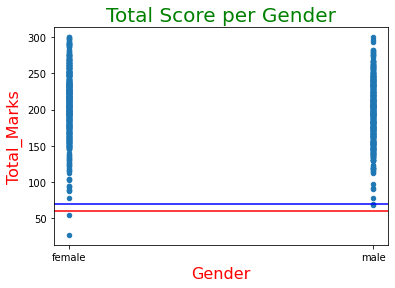

In [117]:
#calculate total score gender wise....

plt.figure(figsize = [6,6])
df.plot(kind='scatter', x='gender', y='Total_Marks')
plt.xlabel('Gender', color='r',size=16)
plt.ylabel('Total_Marks', color='r',size=16)
plt.title('Total Score per Gender', color='g',size=20)
plt.axhline(70,color='b')
plt.axhline(60,color='r')

Feature Engineering

In [118]:
df.gender = [1 if each == "female" else 0 for each in df.gender]
df.gender.value_counts()

1    518
0    482
Name: gender, dtype: int64

In [119]:
y = df.gender
df.drop(["gender"],axis = 1 , inplace = True)
df.columns

Index(['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total_Marks', 'Percentage'],
      dtype='object')

In [127]:
df = pd.get_dummies(df,columns = ["race/ethnicity","lunch","parental level of education",
                                      "test preparation course"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   math score                                      1000 non-null   int64  
 1   reading score                                   1000 non-null   int64  
 2   writing score                                   1000 non-null   int64  
 3   Total_Marks                                     1000 non-null   int64  
 4   Percentage                                      1000 non-null   float64
 5   race/ethnicity_group A                          1000 non-null   uint8  
 6   race/ethnicity_group B                          1000 non-null   uint8  
 7   race/ethnicity_group C                          1000 non-null   uint8  
 8   race/ethnicity_group D                          1000 non-null   uint8  
 9   race/ethnicity_group E                    

In [129]:
x = df.astype(int)
x

,math score,reading score,writing score,Total_Marks,Percentage,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none
0,72,72,74,218,72,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
1,69,90,88,247,82,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
2,90,95,93,278,92,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,47,57,44,148,49,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,76,78,75,229,76,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,282,94,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
996,62,55,55,172,57,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
997,59,71,65,195,65,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
998,68,78,77,223,74,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0


In [131]:
x= (df-np.min(df)) / (np.max(df)-np.min(df))

In [132]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

Prediction

In [133]:
#logistic Regression....

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 10.0, penalty = "l2")
lr.fit(x_train,y_train)
print("Logistic Regression Max Score : ",lr.score(x_test,y_test))
lr_max = lr.score(x_test,y_test)

Logistic Regression Max Score :  0.915
